In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import json

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
%matplotlib inline

In [3]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
# where WellClass and Ga[ codes are located
sys.path.append('../src')

In [5]:
# WellClass
# from well_class_v2 import csv_parser, Well
from WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from WellClass.libs.well_class import Well
from WellClass.libs.well_pressure import Pressure

# plots
from WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [6]:
# use yaml or csv input file
use_yaml = False

In [7]:
# pick an example from given three options

case_type = 'cosmo'

case_type = 'smeaheia_v1'

case_type = 'smeaheia_v2'

case_type = 'frigg'

In [8]:
# where pvt located
pvt_path = '../test_data/pvt_constants/'

# Examples

The following are the test examples.

In [9]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
cosmo = {
         'well_input': r'GaP_input_Cosmo_v3.csv', 
         'well_input_yaml': r'cosmo.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/cosmo', 
         'simcase': r'TEMP-0'}

frigg = {
         'well_input': r'GaP_input_Frigg_v3.csv', 
         'sim_path': r'../test_data/examples/frigg', }

In [10]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'cosmo': cosmo,
    'frigg': frigg
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [11]:
# the selected example for testing
case = examples[case_type]


In [12]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [13]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [14]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [15]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
)

Hydrostatic pressure at reference depth 1217 is 120.23
RP1 set as hydrostatic P = 120.23 bar
Reference depth: 1217.0


# Visualization

## to do
Verify cement plugs computation

In [16]:
a ="Wellname       UWN            UTMnorth       UTMeast        MeasDepth(m)   MeasTVD(m)     Dip            Azimuth        Location(NS)   Location(EW)   Dogleg"
a.split()


['Wellname',
 'UWN',
 'UTMnorth',
 'UTMeast',
 'MeasDepth(m)',
 'MeasTVD(m)',
 'Dip',
 'Azimuth',
 'Location(NS)',
 'Location(EW)',
 'Dogleg']

In [17]:
import welly
import numpy as np

w = welly.Well()
survey = np.loadtxt(r'../test_data/examples/frigg/X_5687dev.txt', skiprows=1, dtype={'names':('Wellname',
                                                                                     'UWN',
                                                                                     'UTMnorth',
                                                                                     'UTMeast',
                                                                                     'MeasDepth(m)',
                                                                                     'MeasTVD(m)',
                                                                                     'Dip',
                                                                                     'Azimuth',
                                                                                     'Location(NS)',
                                                                                     'Location(EW)',
                                                                                     'Dogleg'),
                                                                             'formats':['|S10']+10*[float]})


w.location.add_deviation(  np.stack([survey['MeasDepth(m)'], survey['Dip'],survey['Azimuth']]).T, td=4721)

t = w.location.trajectory(elev=False)

t

array([[ 9.80073057e-01,  2.12983108e+00, -2.12372367e-02],
       [ 9.39674203e-01,  2.08209499e+00,  4.70498414e+00],
       [ 9.00013944e-01,  2.03502316e+00,  9.43119965e+00],
       ...,
       [ 4.24765181e+01, -7.35408509e+01,  4.70524231e+03],
       [ 4.30823441e+01, -7.36760930e+01,  4.70993322e+03],
       [ 4.37019070e+01, -7.38107498e+01,  4.71462306e+03]])

In [18]:
a = np.stack([survey['MeasDepth(m)'], survey['Dip'],survey['Azimuth']])
a.shape

(3, 158)

In [37]:
w.location.tvd


array([   0.        ,  219.99899476,  247.99874112,  275.99847257,
        308.99819847,  335.99801551,  366.99705615,  421.9960542 ,
        448.99567622,  478.99390217,  508.99153258,  521.99130413,
        573.99058802,  654.9880008 ,  716.98689074,  763.98655375,
        810.98512607,  859.98416525,  906.98326788,  915.98310794,
        936.97941348,  945.97497213,  953.9716581 ,  961.96891269,
        971.96614061,  979.96374969,  993.9603915 , 1042.95293408,
       1081.94861431, 1213.94537412, 1297.94274643, 1326.94090421,
       1346.93981188, 1402.93560785, 1452.92522877, 1508.90605378,
       1546.89127674, 1575.87851395, 1666.84085624, 1756.80796588,
       1811.79038024, 1870.77148365, 1929.74989494, 1934.74806492,
       1982.7316343 , 2032.71337073, 2073.69738546, 2119.67841252,
       2172.65265447, 2222.63054708, 2265.61732992, 2302.58990552,
       2314.57757106, 2322.56836659, 2334.55300936, 2343.54026236,
       2352.52622474, 2382.48507723, 2401.46631448, 2410.45874

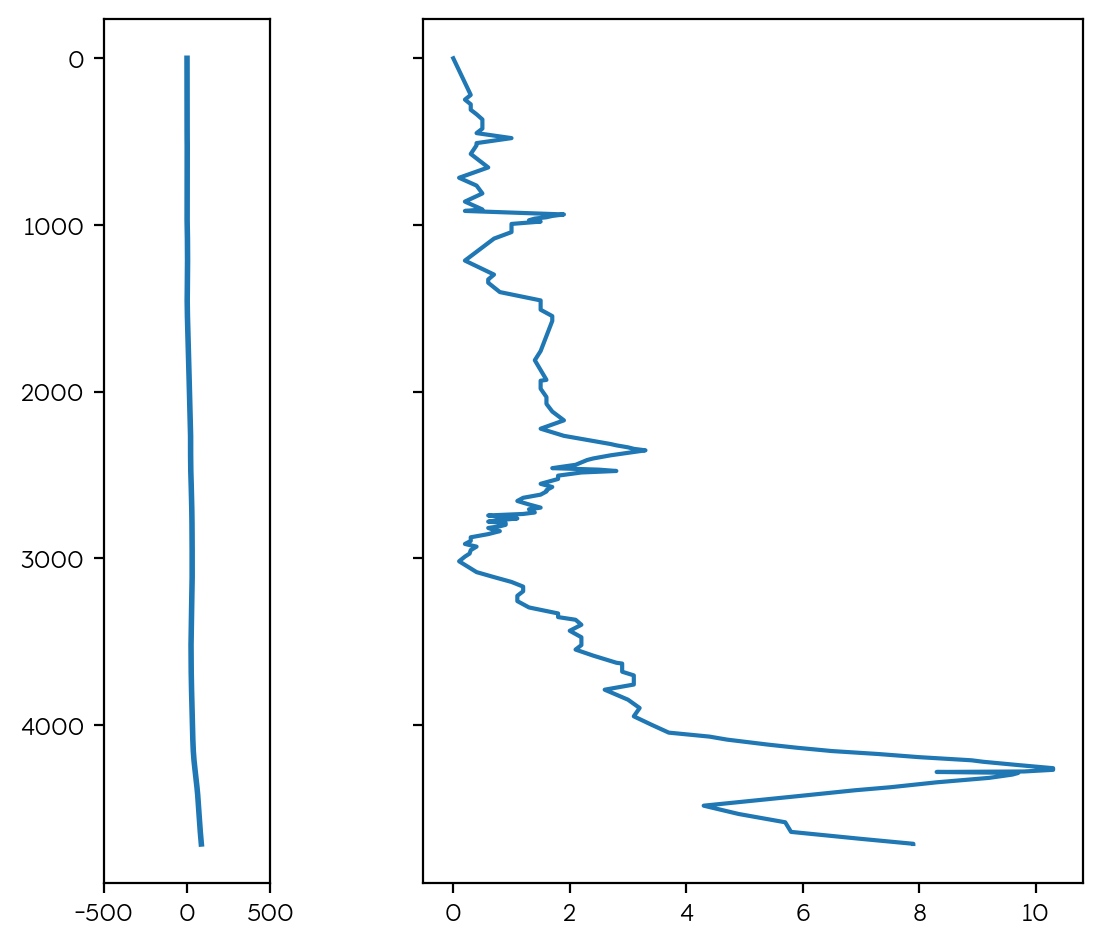

In [39]:
fig, (ax, ax2) = plt.subplots(1,2,sharey=True)
#MD
md_welly = w.location.deviation[:, 0]
w.location.tvd

#Horizontal offset of the well
os = np.sqrt(w.location.position[:,0]**2+w.location.position[:,1]**2)

ax.plot(os, w.location.tvd, lw=2, label="welly")

ax2.plot(w.location.deviation[:, 1], w.location.tvd, )
ax.set_xlim(-500, 500)
ax.set_aspect(1)
ax.invert_yaxis()

fig.tight_layout()


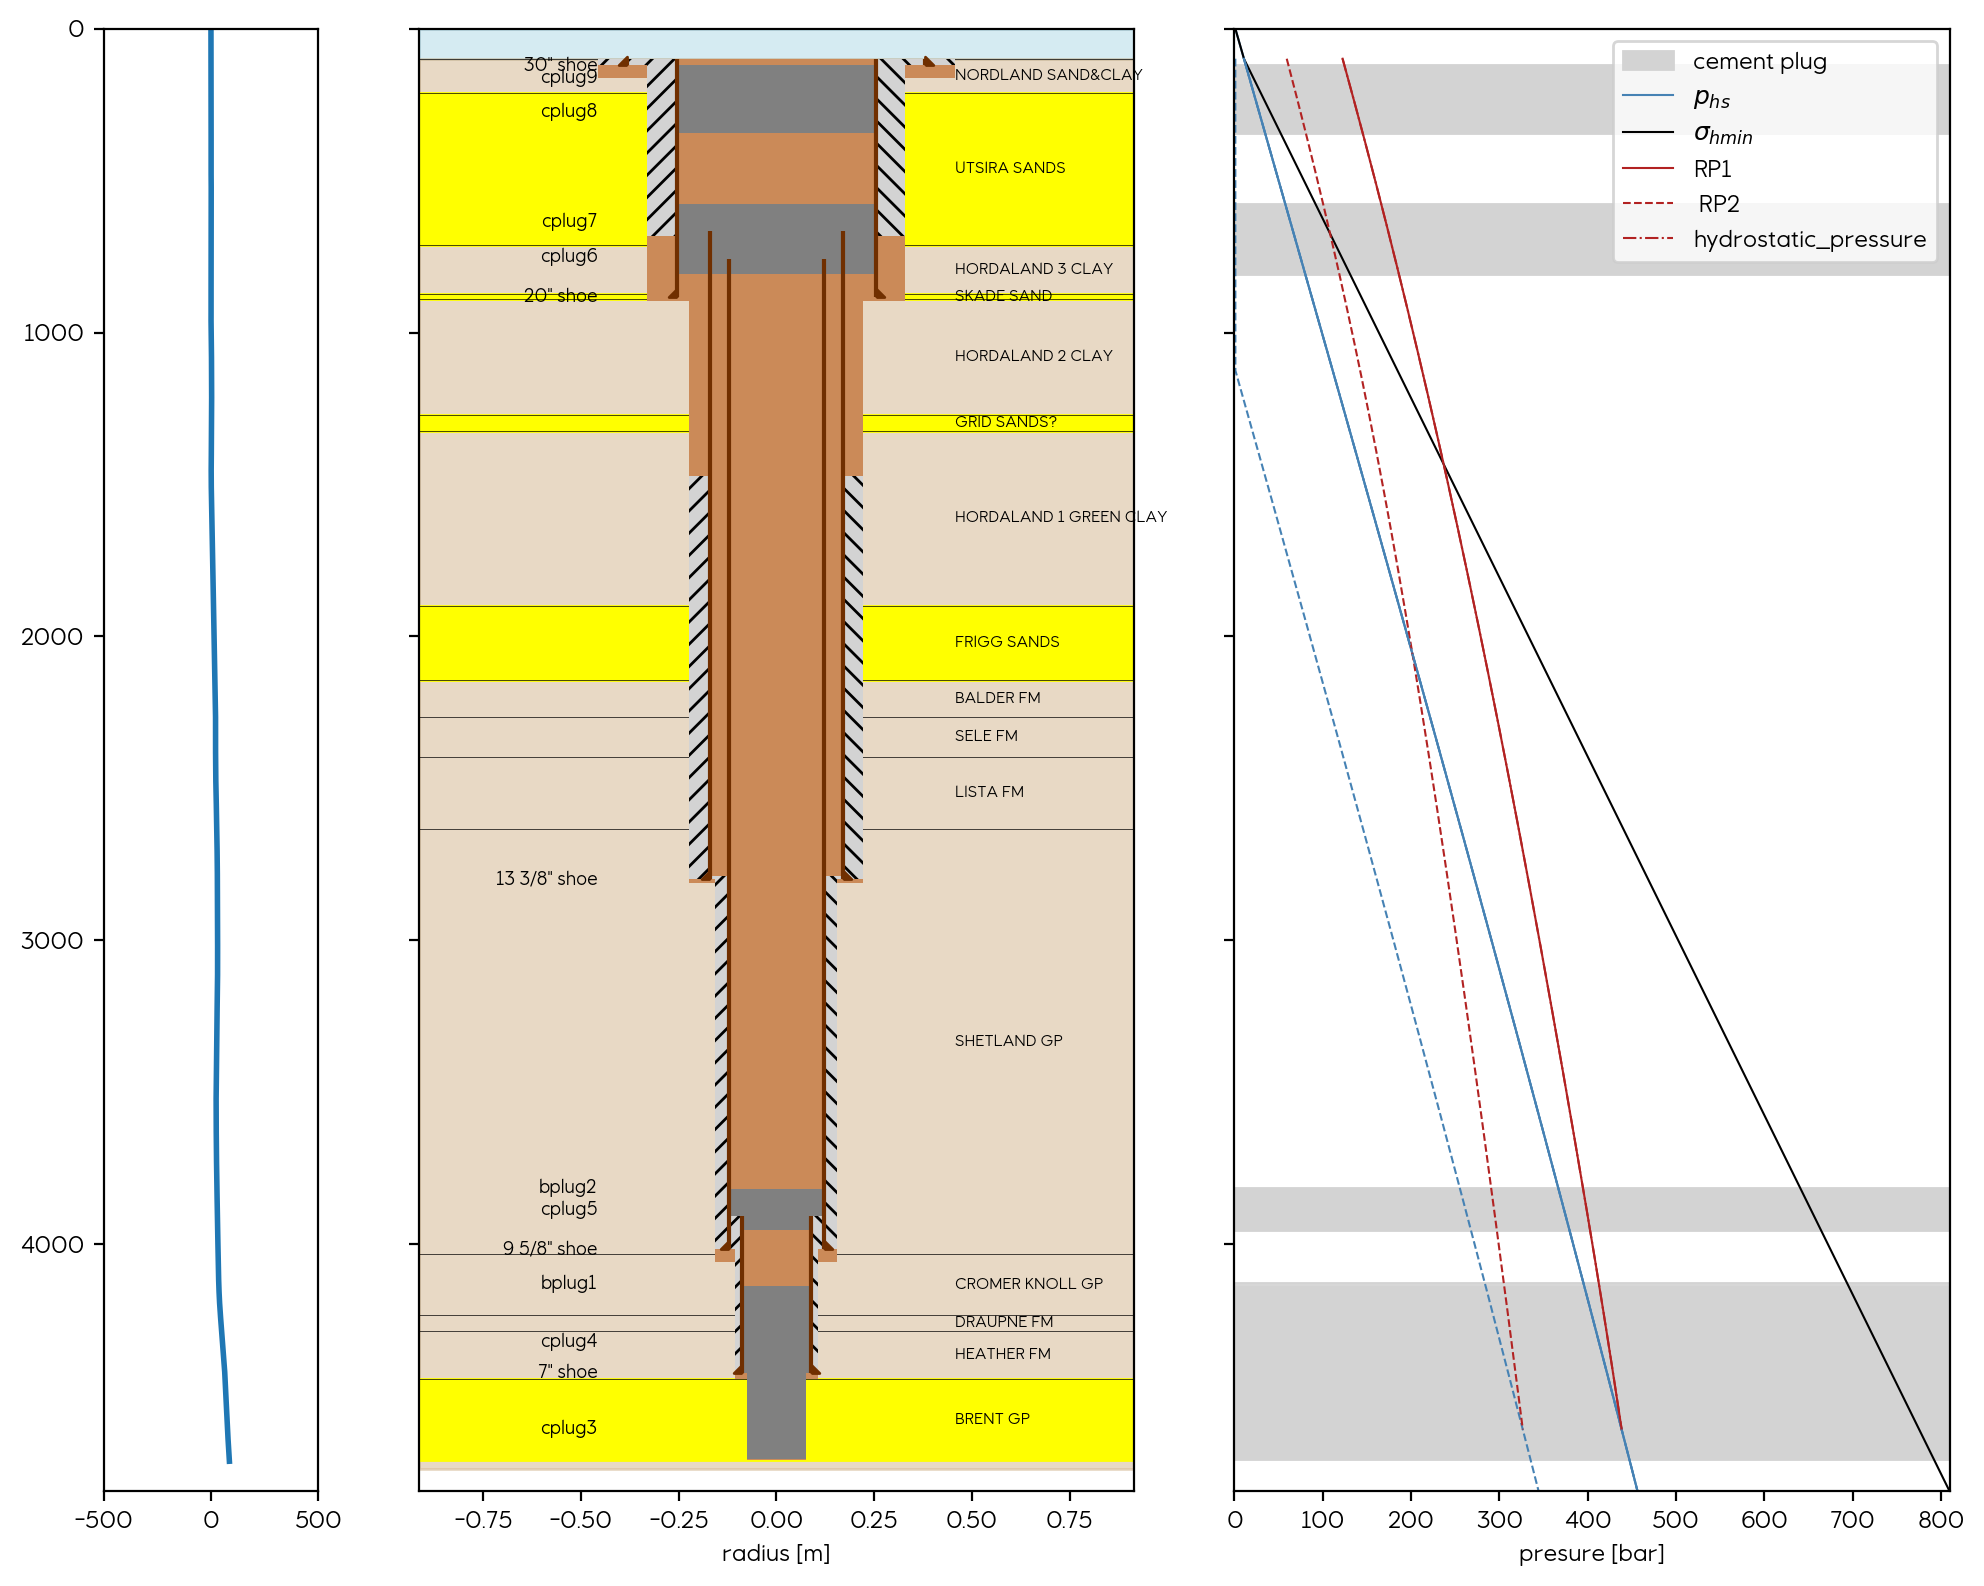

In [44]:
#Plot sketch, pressures
fig, (ax0, ax1, ax2) = plt.subplots(1,3, sharey=True, figsize=(10, 8), width_ratios=[0.3,1, 1])
plot_sketch(my_well, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2)

ax0.plot(os, w.location.tvd, lw=2, label="welly")
# ax0.set_aspect(1)
ax0.set_xlim(-500, 500)


fig.tight_layout()

In [204]:
pt_df = my_pressure.pressure_CO2

pt_df


,depth_msl,temp,hs_p,RHOH2O,Shmin,RP1_h2o,RP1_h2o_rho,RP1_co2,RP1_co2_rho,RP1_h2o_rho_in_co2_column,RP2_h2o,RP2_h2o_rho,RP2_co2,RP2_co2_rho,RP2_h2o_rho_in_co2_column,hydrostatic_pressure_h2o,hydrostatic_pressure_h2o_rho,hydrostatic_pressure_co2,hydrostatic_pressure_co2_rho,hydrostatic_pressure_h2o_rho_in_co2_column
0,0,4.00,1.013250,999.974869,1.013250,1.013250,999.979639,113.091827,961.758572,1005.451140,1.013250,999.974869,50.296207,914.793517,1002.399867,1.013250,999.979639,113.091827,961.758572,1005.451140
1,1,4.00,1.111314,999.974869,1.111314,1.109651,999.984491,113.186143,961.815059,1005.455691,1.013250,999.974869,50.385917,914.880647,1002.404257,1.109651,999.984491,113.186143,961.815059,1005.455691
2,2,4.00,1.209379,999.979721,1.209379,1.207716,999.989343,113.280465,961.871520,1005.460242,1.013250,999.974869,50.475636,914.967696,1002.408647,1.207716,999.989343,113.280465,961.871520,1005.460242
3,3,4.00,1.307444,999.984573,1.307444,1.305782,999.994195,113.374792,961.927955,1005.464793,1.013250,999.974869,50.565364,915.054663,1002.413037,1.305782,999.994195,113.374792,961.927955,1005.464793
4,4,4.00,1.405509,999.989425,1.405509,1.403848,999.999047,113.469125,961.984364,1005.469344,1.013250,999.974869,50.655100,915.141549,1002.417428,1.403848,999.999047,113.469125,961.984364,1005.469344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,4709,188.40,447.244259,902.621483,792.118896,447.244259,902.621483,NaN,NaN,NaN,335.268662,898.799022,NaN,NaN,NaN,447.244259,902.621483,NaN,NaN,NaN
4710,4710,188.44,447.332772,902.582054,792.288396,447.332772,902.582054,NaN,NaN,NaN,335.356801,898.764093,NaN,NaN,NaN,447.332772,902.582054,NaN,NaN,NaN
4711,4711,188.48,447.421282,902.542620,792.457896,447.421282,902.542620,NaN,NaN,NaN,335.444936,898.729159,NaN,NaN,NaN,447.421282,902.542620,NaN,NaN,NaN
4712,4712,188.52,447.509787,902.503179,792.627396,447.509787,902.503179,NaN,NaN,NaN,335.533068,898.694220,NaN,NaN,NaN,447.509787,902.503179,NaN,NaN,NaN


In [163]:
import pandas as pd
pd.DataFrame(my_well.geology)

,top_rkb,geol_unit,reservoir_flag,top_msl,base_msl
0,126,NORDLAND SAND&CLAY,False,99.0,211.0
1,238,UTSIRA SANDS,True,211.0,711.0
2,738,HORDALAND 3 CLAY,False,711.0,873.0
3,900,SKADE SAND,True,873.0,889.0
4,916,HORDALAND 2 CLAY,False,889.0,1273.0
5,1300,GRID SANDS?,True,1273.0,1323.0
6,1350,HORDALAND 1 GREEN CLAY,False,1323.0,1899.0
7,1926,FRIGG SANDS,True,1899.0,2144.0
8,2171,BALDER FM,False,2144.0,2264.0
9,2291,SELE FM,False,2264.0,2396.0


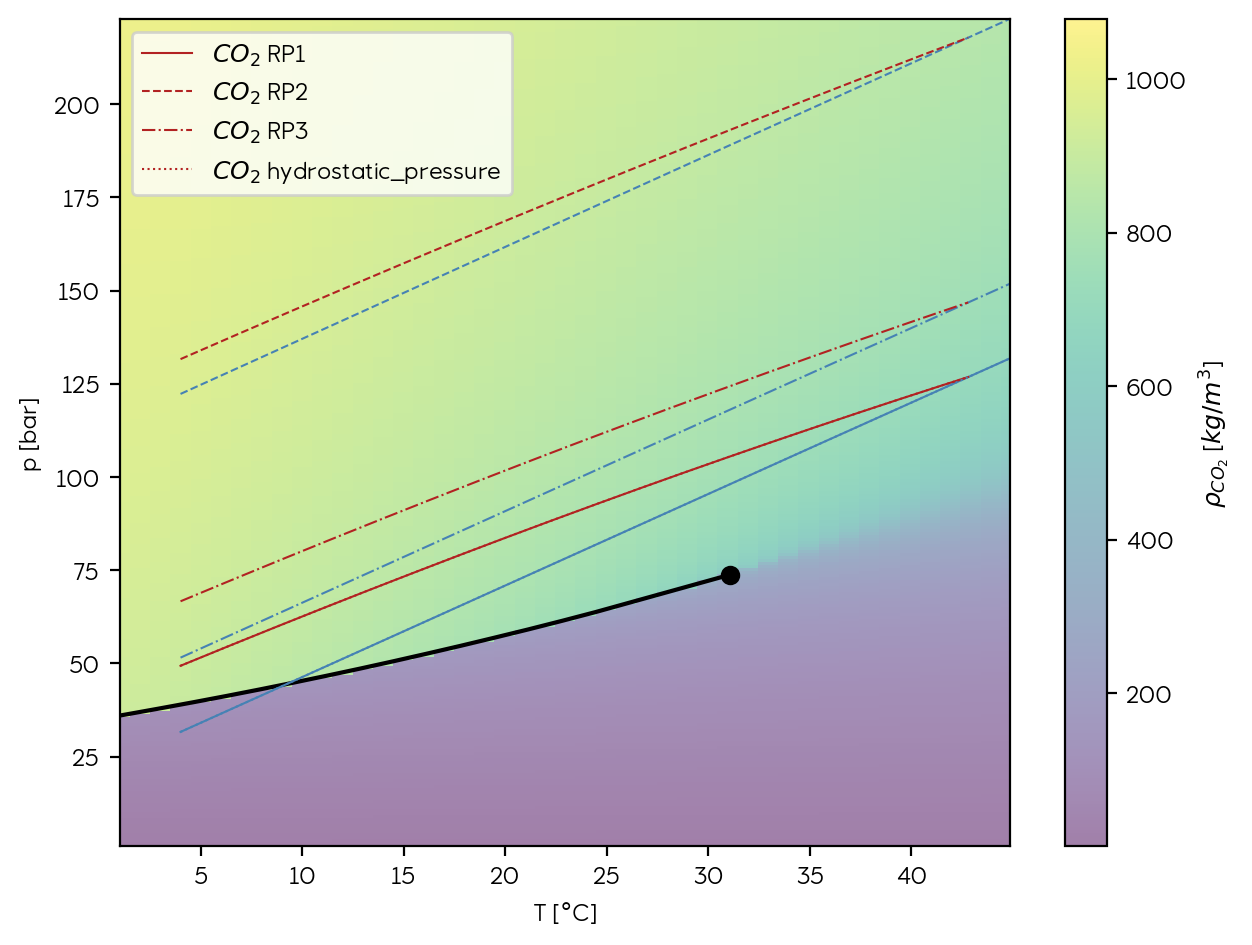

In [17]:
plot_pt(my_pressure)